# ***Introducing Dataset***

# ***Problem Statement***

# ***Loading Dataset***

In [26]:
# importing libraries for uploading dataset
import pandas as pd
import numpy as np
# Assigning a variable to the uploaded dataset
data = pd.read_csv('Country-data.csv')
# Printing header of dataset
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###  **Basic Description for the dataset**

In this dataset, there are 167 countries which also means that we have these number of data points. I feel for now that all of the features in dataset are important because they might influence the poverty level a country is facing. There are different features which impacts the socio-economic growth and health improvement of country and all of them are related differently to the problem statement. What does each feature mean and how it impacts:
* **country** - Name of the country
* **Child_mort** - It means death of children under 5 years of age per 1000 live births. If this feature is relatively high country it means county is lagging behind in health and is facing poverty which can be important feature while grouping.
* **Exports** - Exports of goods and services per capita.If this is high, it means that country is important at some level and might be less poor.
* **Health** - Total health spending per capita. If this is high it means country is focusing in health and might have less health issues.
* **imports** - Imports of goods and services per capita. Given as %age of the GDP per capita. If this high it means country is dependent on another country for services and products.
* **income** - Net income per person.If this is high it means country economic growth is better and people might have less health issues but if it is relatively low then country is poor because people might not be able to spend o health services. Cluster with countries having less per capita income can also be the one need more attention by HELP organization.
* **Inflation** - The measurement of the annual growth rate of the Total GDP.
* **life_expectancy** - The average number of years a new born child would live if the current mortality patterns are to remain the same.If it is good means country is doing good in health sector and people are able get all of the basic needs in their life.
* **total_fer** - The number of children that would be born to each woman if the current age-fertility rates remain the same.Higher population can be a reason of poverty.
* **gdpp** - The GDP per capita. Calculated as the Total GDP divided by the total population. If this is good, it means country has good socio-economic growth and is also doing better in Health sector. This feature can be important while doing grouping.

## **Summarising dataset by using describe function**

In [27]:
# Using describe function to know about the statistics of data
data.describe(include = 'all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Uganda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


### Key highlights from describe function
* Mean of child_mort  rate is 38.27 while the higher value is 208.0. The wide difference tells us the wide range of values that countries have. 75% of countries have child_mort late less than 62 which is a good point but can also make little imbalance in clusters.
* For some of the features like exports, import and iflation difference between mean and max value is high which means that some countries can be better as compared to others.
* Life expectancy might have less range because there is less difference between mean and max value.

## **Checking the quality of data**

In [28]:
# Checking for correct data types  
print('Data types for each column\n',data.dtypes)

Data types for each column
 country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


By reading the decription for each dataset, I believe that every feature has correct data types like all of the rate values such as child_mort,exports,health,imports,inflation,life_expectancy and total_fer can be a decimal number. Country is a name so it will be an object type.Gdp and income should be integers.

In [29]:
# missing values by using .info 
print('Missing values\n',data.isna().sum())

Missing values
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


There is no missing values in the dataset we check by using pd.isna().sum() so our dataset is clean at some point and does not require the stage of handling missing values..Info function was not working properly.

In [30]:
# Checking for duplicates
data.duplicated().sum()

0

This dataset is fully cleaned because it has correct data types, no missing values as well as there are no duplicate values to remove.

## **Separating Labels from the dataset**

In [31]:
#As this is a data for unsupervised machine learning so we are going to drop country column and will store it differently.
Y = data['country']
X = data.drop(columns=['country'])
# Printing X data for double checking
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# ***Visualizing dataset***

In [32]:
# importing libraries for drawing heatmap and pairplot
import matplotlib.pyplot as plt
import seaborn as sns

## **Representing Heatmap**

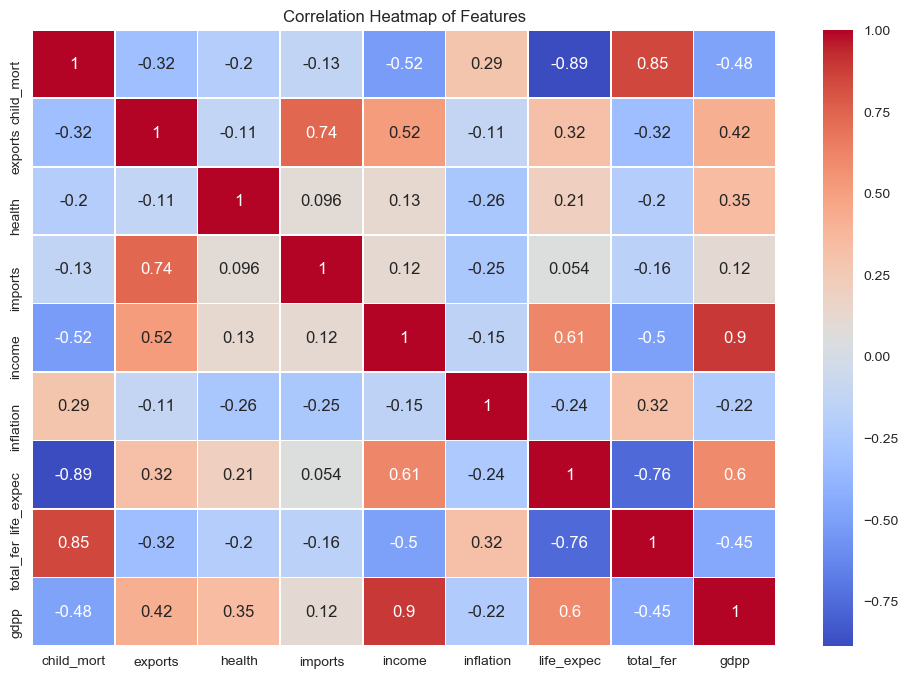

In [33]:
# Building heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


**Keyhighlights from Heatmap**
* We see that there is negative relationship between child_mort and gdpp because high gdp shows the country is developed which means child_mort will be low technically.As expected there is positive relationship between income,life_expectancy,exports,health,imports and gdp.Moreover,there is negative relationship between inflation and gdp.
* Surprisingly there is a weak positive relationship between income and health. There is strong positive relationship between imports and exports means if export is high then imports will be high too.
* There is negative relationship between gdp and inflation as well as there is negative relation between income and inflation because higher inflation will effect income.Relationship between life expectancy and inflation because higher prices can effect the life of a person.

## **Building Pairplot**

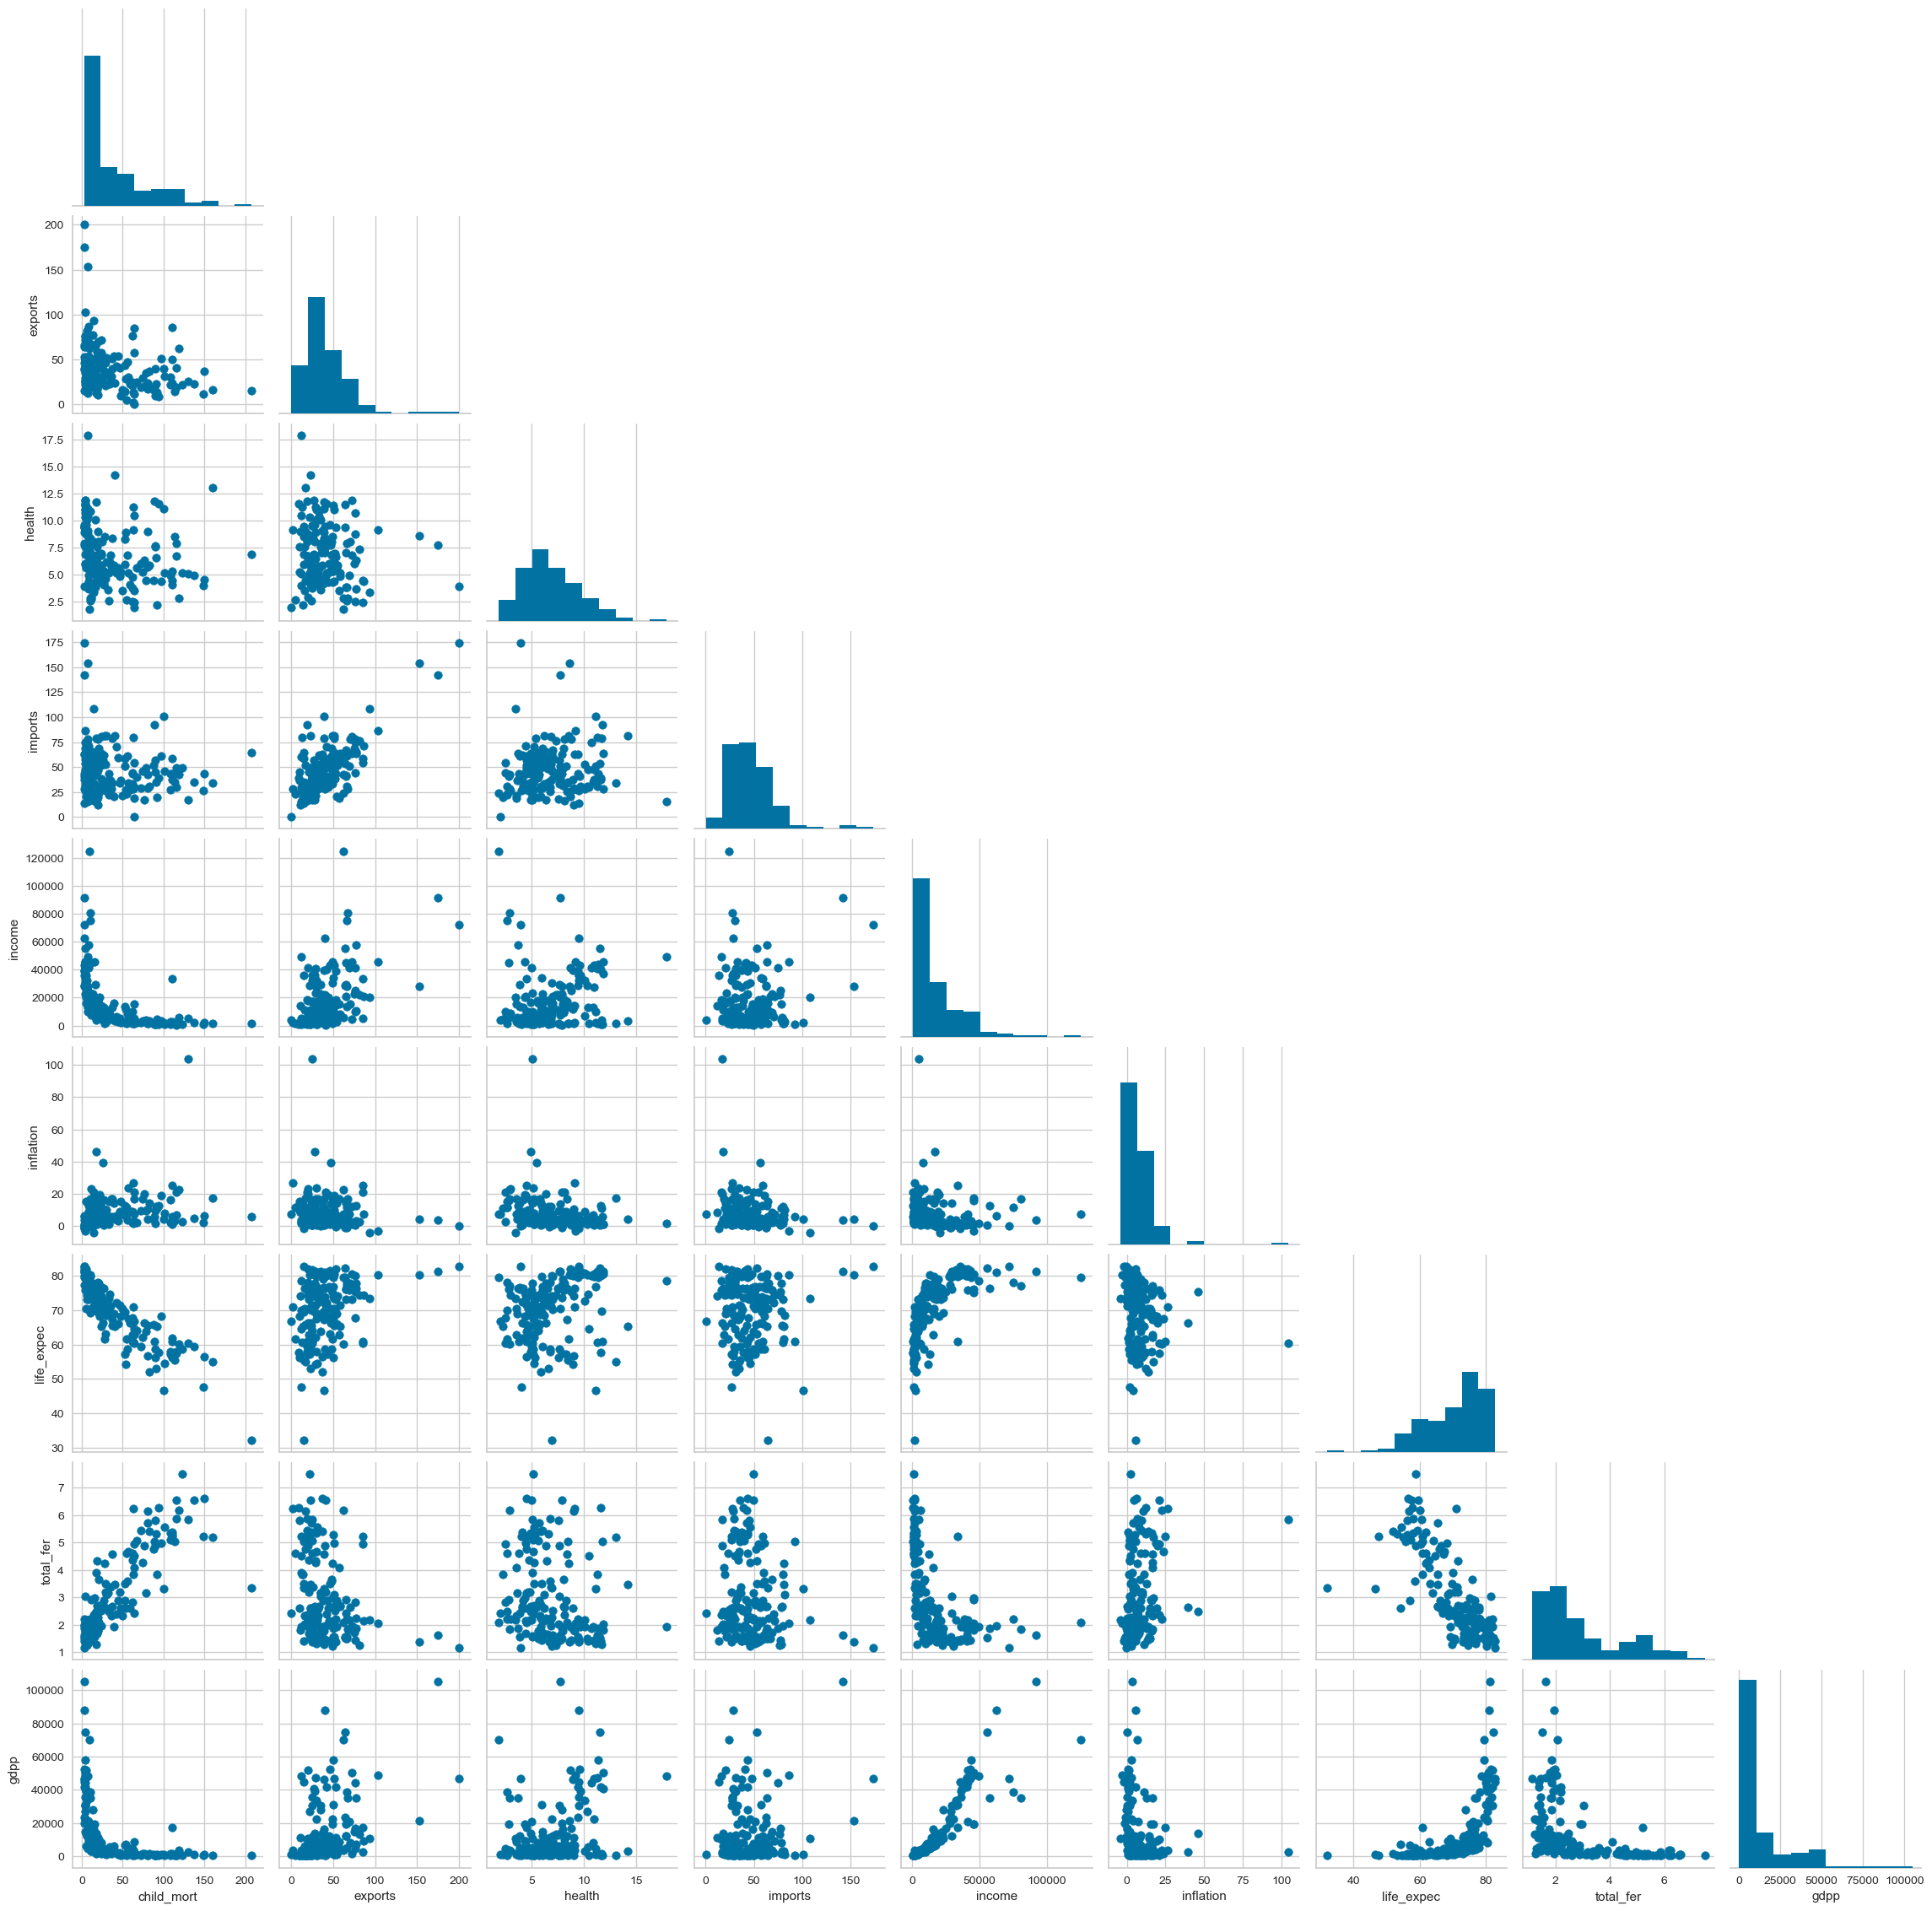

In [34]:
# Drawing pairplot
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.PairGrid(X, corner=True)

plot.map_lower(plt.scatter)   
plot.map_diag(plt.hist)

plt.show()


**Keyhighlights from Pairplot**
* We see that for some features how there is a clear positive and negative relationship between two features which gives us an idea that if one is low then technically other one will be low too so it might gives us a hint to make 2 clusters.
* Scatter plot for some features is compacted while for some it is widely spreas like for health and total_fer.
* There is a negative relationship between life expectancy and gdp which is unexpected because usually high gdp can be a chance of increase in age for people.These unexpected things can make us to think of more clusters.
* We can see that how there some outliers in the dataset.

# **Modeling**

In [35]:
# Scaling data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


After doing research I found that it is important to scale data because we have features with different data values such as income is in thousands while some of there features are showing us rate in percentage and are technically less than 100. To make sure that every feature contribute in equal manner we scale the data.

In [36]:
# Converting scaled data into dataframe from a numpy array
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)

# Print transformed header
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


By doing this we see the change as these values are now between 0 and 1 because it will help us to cluster the points in an effective way.

### ***Applying silhouette score method***

In [42]:
# Using silhouette score method, Importing libraries
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [43]:
# Checking the silhouette score for the given range
silhou_score =[]
# We need to go through from cluster k = 2 to k = 10
k_clusters = range(2,11)
# Using function for going through every cluster
for k in k_clusters:
    kmeans = KMeans(n_clusters=k,random_state=42, n_init=10)
    # getting labels for the dataset
    labels = kmeans.fit_predict(scaled_data)
    # Calculating silhouette score
    score = silhouette_score(scaled_data,labels)
    # Adding values to the silhou_score list
    silhou_score.append(score)
    # Printing silhouette score for each cluster
    print("Silhouette score the cluster",k,"is",score, ".")

Silhouette score the cluster 2 is 0.28735668921406704 .
Silhouette score the cluster 3 is 0.28329575683463126 .
Silhouette score the cluster 4 is 0.301375962376881 .
Silhouette score the cluster 5 is 0.2992594995920442 .
Silhouette score the cluster 6 is 0.23506989275162896 .
Silhouette score the cluster 7 is 0.24905003461730515 .
Silhouette score the cluster 8 is 0.2414024552159115 .
Silhouette score the cluster 9 is 0.20340692932613638 .
Silhouette score the cluster 10 is 0.21931388763003506 .


If we see this we can say that silhouette score for cluster number 4 is high, technically we can chose number of clusters as 4 but as I tried to tune the n_init and random state there is a slight change in values.Moreover, the difference between cluster 5 and 4 is very low so it can not be a clear choice to select number of clusters as 4 that's why we are going  beyond in the selection of number of clusters.

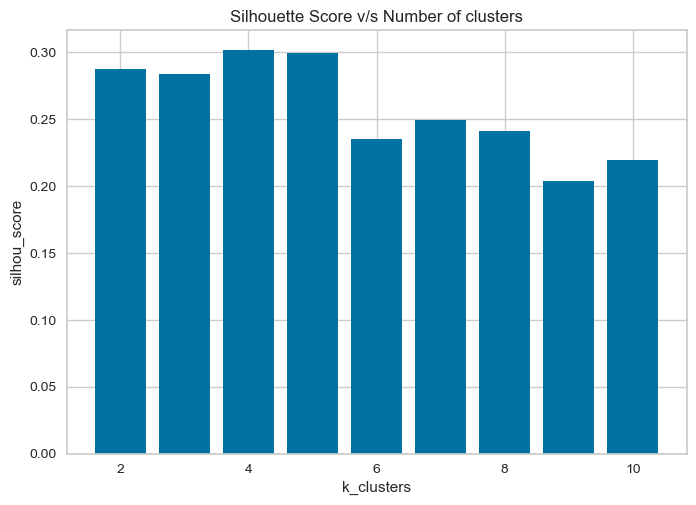

In [44]:
# Visualizing this as a graph
plt.bar(k_clusters,silhou_score)
plt.title("Silhouette Score v/s Number of clusters")
plt.xlabel("k_clusters")
plt.ylabel("silhou_score")
plt.show()

**Key Highlights from the Graph**
* As we already discussed that how silhouette score varied for the number of clusters.
* We can see that cluster 4 has higher silhouette score then chosing other number of clusters.But the difference between score for cluster 4 and 5 is not that big so it can't be like an accurate decision.

## ***Using elbow method for better understanding***

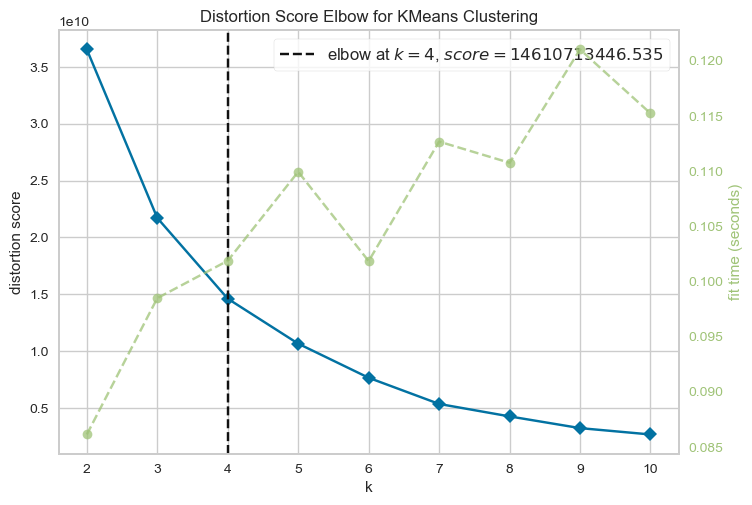

In [45]:
# Importing libraries for elbow method
from yellowbrick.cluster import KElbowVisualizer
# Clustering model by elbow method and drawing graph
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,11))
# Fitting the data into visualizer model
visualizer.fit(X)
#Plotting the graph
visualizer.show()

I used elbow method after silhouette score because I still have some confusion between chosing cluster as 5 or 4 and as we see it gives me a clear signal of chosing 4 number of cluster but it did not explain why and not 5. So, I have make another assumptions which will help me to understand that what is happening when I chose cluster 5 or 4.

**My steps for further analysis**
* I will try to see that if the datapoints are more balanced in cluster 4 or chosing 5 clusters.
* I will also look on that the features in cluster  are really distinguishing them from other clusters.Is it more clear in number of clusters as 4 or 5.

Well, intially I have decided to work on cluster 4 and 5 so we will see that how the data points are distributed as well as is it suitable for interpretation in further analysis.

In [47]:
# I will focus on values like k=4 and k =5
# If clusters are 4
k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
label4 = k4.fit_predict(scaled_data)
# If clusters are 5
k5 = KMeans(n_clusters=5, random_state=42, n_init=10)
label5 = k5.fit_predict(scaled_data)
# If clusters are 6
k6 = KMeans(n_clusters =6,random_state = 42, n_init = 10)
label6 = k6.fit_predict(scaled_data)

In [48]:
# Adding the labels to original dataframe for cluster = 4 and cluster =5
data['cluster_k4'] = label4
data['cluster_k5'] = label5
data['cluster_k6'] = label6

**Lets us check the number of datapoints in for 4 clusters**

In [ ]:
# Checking the size of clusters according to number of clusters, k=4
data['cluster_k4'].value_counts()

***Surprisingly, we see that there is an imbalance in the distribution because one of the cluster has only 3 datapoints so it will not help us to get an overall view.***

In [49]:
# Lets see the distribution of datapoints in 5 clusters
data['cluster_k5'].value_counts()

2    84
0    47
1    32
4     3
3     1
Name: cluster_k5, dtype: int64

In [50]:
# Lets see the distribution of datapoints in 6 clusters
data['cluster_k6'].value_counts()

0    49
1    45
2    42
3    22
5     8
4     1
Name: cluster_k6, dtype: int64

**I noticed a pattern that if I increase number of cluster I see the more imbalance in the dataset even in the 5 clusters one cluster has a single datapoint and this thing can mislead us while taking an effective decision.So, I have decided not to chose  cluster 5 and 4 and have reject both silhouette scroe and elbow method for now. So let us try to decrease the number of clusters.**

In [62]:
# What if the cluster numbers are 3?
k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
label3 = k3.fit_predict(scaled_data)
# Selecting cluster k3
data['cluster_k3'] = label3
# Counting data points in 3 clusters
data['cluster_k3'].value_counts()


2    84
1    47
0    36
Name: cluster_k3, dtype: int64

**Now, a different thing happen I see that data is distributed in a way that it makes sense. There is some imbalance but not that much as compared to cluster 4 and 5.I see that one cluster has 84 points while other has 47 and the third one has 36.**

In [63]:
# lets try with number of cluster as 2
k2 = KMeans(n_clusters=2, random_state=42, n_init=10)
label2 = k2.fit_predict(scaled_data)
# Selecting cluster k3
data['cluster_k2'] = label2
# Counting data points in 3 clusters
data['cluster_k2'].value_counts()


0    99
1    68
Name: cluster_k2, dtype: int64

**As, we see that both of the clusters has a broad number of datapoints but it does not sound good because imagine if there are some countries in cluster number 1 that are not that bad in economy and progressing but are just fit it into group with other poor countries because they have same exports and imports. So the organization which really wants to help the poor countries will also distribute money to those countries who are average too and it will not be that much helpful to poor countries.**

### **Final decision  - Total number of clusters as 3**

In [64]:
# Deciding on cluster no.3
data['cluster_k3'] = label3
# Adding country names to data frame
data['country'] = Y

In [65]:
# Checking that how many countries are in each cluster and what are they
for c in sorted(data['cluster_k3'].unique()):
    print(f"\nCluster {c}:")
    print(data[data['cluster_k3'] == c]['country'].values)


Cluster 0:
['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']

Cluster 1:
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']

Cluster 2:
['Albania' 'Algeria' 

In [66]:
# What are the feature values if datapoints are in cluster 3
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
data.groupby('cluster_k3')[features].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_k3,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


**Well, I would do further interpretation in the upcoming section but if I see Australia and Canada in cluster 0. I can partially say that my model is doing good at some level because these countries are recognized as developed. I noticed that if I have to rank the clusters I would say in terms of developing status cluster 0 can be developed, cluster 2 can be developing and cluster 1 can be underdeveloped.**

**Rank of clusters from best to low**
* Cluster 0 -- Countries doing good 
*  Cluster 2 -- Countries doing average
* Cluster 1 -- Countries doing below average

In [67]:
# Out of curiousity I also want to see these statistics for cluster 4 as well
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
data.groupby('cluster_k4')[features].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_k4,,,,,,,,,
0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


**We remembered that cluster 3 only has 3 countries and if we see the features importance it shows that countries are doing great job in economy and If we consider this number of cluster we might have to ignore this cluster because it will be the one who needs least help from the organization.**

# **Drawing final Conclusion for the HELP Organization**

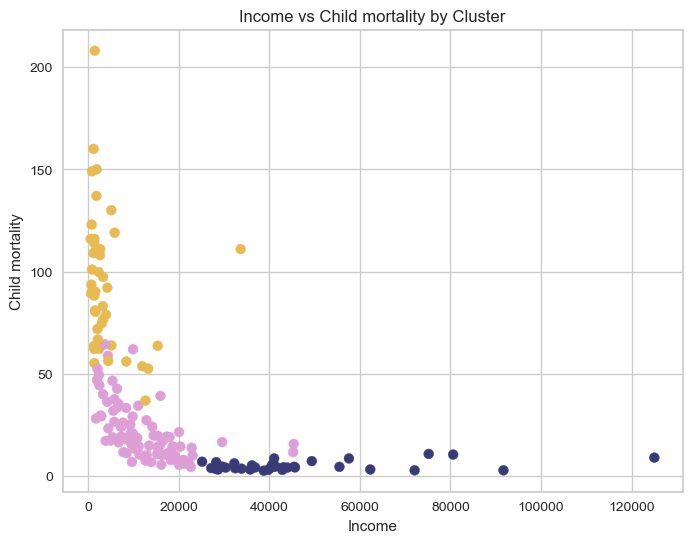

In [70]:
# Doing visualization by scatter plot
# Extract the two features and cluster labels
a = data[['income', 'child_mort']].values
z = data['cluster_k3'].values

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(a[:, 0], a[:, 1], c=z, s=50, cmap='tab20b')

# Add axis labels and title
plt.xlabel('Income')
plt.ylabel('Child mortality')
plt.title('Income vs Child mortality by Cluster')

plt.show()

**Keyhighlights from scatterplot**
* From heatmap, we understand the relationship between income and child_mortality, if we look at the plot then we see that how different color points are respresenting different clusters and x and y-axis are representing income and child_mortality.
* I noticed that how these features are varied for certain cluster groups and if I have to check that which country is doing good I can check on these points.
* The cluster with 'blue' points represent countrie in cluster 0 because the child mortality rate is quite low and the income is better as compared to other cluster countries.
* The cluster with yellow dots represent the countries in cluster 1 because income is low while child mortality rate is quite high.
* The cluster with pink dots represent the countries in cluster 2 because its child mortaility rate is low while income is high as compared to other countries.

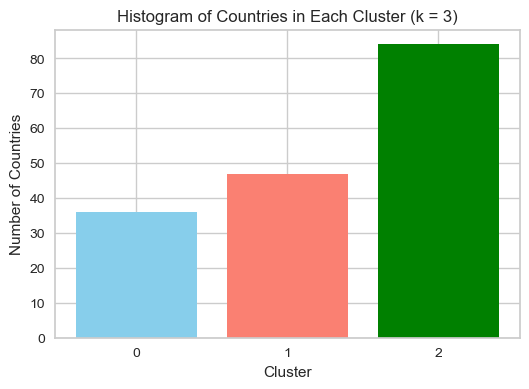

In [72]:
# Drawing histogram for showing cluster size for clusters 3
import matplotlib.pyplot as plt

# Cluster counts
cluster_counts = {0: 36, 1: 47, 2: 84}

# Plotting
plt.figure(figsize=(6,4))
plt.bar(cluster_counts.keys(), cluster_counts.values(), color=['skyblue', 'salmon', 'green'])

plt.xlabel("Cluster")
plt.ylabel("Number of Countries")
plt.title("Histogram of Countries in Each Cluster (k = 3)")
plt.xticks([0, 1, 2])

plt.show()


* **Well, before deciding on number of clusters I checked the size for each cluster varied according to the number of clusters where I find that cluster 3 with size of 84,36 and 47 for cluster was doing good as compared to other clhosing cluster 4 and 5. We noticed that most of the countries fall in cluster 2 and this group has the statistics better than cluster 1 but lower than cluster 0. That's why these countries are doing average in the dataset. These clusters make sense because even in real-life world countries fall like in these kind of groups.**

**As I already printed thhat which countries fall in which group now I will show that is this model good at some level or not.**

#### **Ranking clusters according to the one which needs most aid and which needs least**

In [73]:
# Creating a table
rank_table = {
    "Cluster": [1, 2, 0],
    "Rank": ["Rank 1","Rank 2" ,"Rank 3"],
    "Status": ["Needs most aid", "Needs aid", "Needs least aid"]
}

table = pd.DataFrame(rank_table)
table


,Cluster,Rank,Status
0,1,Rank 1,Needs most aid
1,2,Rank 2,Needs aid
2,0,Rank 3,Needs least aid


#### **Resesarch on model clustering**

**('https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf')** - This is the link of the resource where I get to know about some of the countries. According to this model, the clustering is related to the modern-life at some level.

**Findings from this research**
* I saw that most of the countries in cluster 0 are devloped economies such as Spain,Italy,Japan,Australia,Canada,Australia and Germany.This means that If the model grouped these kind of countries into same cluster, then it is working good.Similarly, countries in cluster 2 which are average according to the model are also developing countries such as India,Russia and Libya.

**Resource - Google AI**
* **Other Countries with Critical Humanitarian Need (2025)
Afghanistan: Over 22.9 million people need assistance due to conflict and drought.
Democratic Republic of Congo (DRC): Intense conflict in eastern provinces, displacing over a million.
Ukraine: Ongoing war has left nearly 13 million people in need of aid.
Ethiopia, Chad, Niger, Nigeria, Cameroon, CAR: High-need areas in the Sahel and Eastern Africa**
* This the information which mentions most of the countries that are in Cluster 1 and needs help such as Chad,Niger,Nigeria,DRC and Afghanistan.

**Resource - https://www.rescue.org/uk/article/10-crises-world-cant-ignore-2025**
This article shows the countries which faces alot of challenge back in year 2025 and needs help. The countries in the article are in group 1 such as Sudan,Haiti,Mali and Burkina Faso.

### Distribution of fund among countries
* Well, I think countries in Cluster 1 should get maximum percentage of fund out of $ 100 million. The percentage should be higher than what is distributed to other clusters so these countries should be given 80 million dollars for sure. Which means 80% of the funds raised should be allocated to them because if we look at average income,gdp, and life expectancy rate values are quite low while other values like child_mortality rate and inflation mean is high. So each country will get around 2 million dollars as financial help. Moreover, to adopt another method there should be ranking in the cluster 1 where countries should be rank from lower to best and by following that. For example,Afghanistan,Sudan and DRC at worst in today's world and they should be given some extra benefits. Like the proportion should be in a way that these countries get some extra benefits as compared to other countries. This will help the organization to use money effectively and strategically.
* Then,15% of the fund should be given to countries in cluster 2 because they are doing that bad economically and are recognized as developing countries but the economic features are lower then countries in cluster 0. By doing this, each country will get around 2 lakh dollars which is good because for these countries currency value is quite low so it will give them some benefits. These money should be gone to the NGO;S available in the developing countries because they will make the best use out of it.These countries needs most of help in  countryside area so these should be the focus areas for the NGO'S.
* Countries in the cluster 0 should be given only 5% of the total fund because according to research this countries are not recognized as aid recipients. 5 million should be given to those countries which are currently facing some challenges currently like Israel and European countries are managing defense capabilites.